In [1]:
import keras
keras.__version__

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'2.1.5'

In [18]:
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(60, 100, 3))

In [19]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 60, 100, 3)        0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 60, 100, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 60, 100, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 30, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 30, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 30, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 15, 25, 128)       0         
__________

In [20]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

train_dir = "/home/ajith/sig/dataset/trainingSet/train/"

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 10

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 15, 25, 128))
    labels = np.zeros(shape=(sample_count, 2))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(60, 100),
        batch_size=batch_size,
        class_mode='categorical')
    i = 0
    import time
    for inputs_batch, labels_batch in generator:
        s = time.time()
        from keras.models import Model
        layer_name = 'block2_pool'
        intermediate_layer_model = Model(inputs=conv_base.input,
                                 outputs=conv_base.get_layer(layer_name).output)
        features_batch = intermediate_layer_model.predict(inputs_batch)
        e = time.time()
        print(batch_size * (i + 1), "images being processed", e - s)
        try:
            features[i * batch_size : (i + 1) * batch_size] = features_batch
            labels[i * batch_size : (i + 1) * batch_size] = labels_batch
            i += 1
        except:
            end_batch_size = sample_count - (i * batch_size)
            features[i * batch_size: (i * batch_size) + end_batch_size] = features_batch
            labels[i * batch_size: (i * batch_size) + end_batch_size] = labels_batch
            i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels, generator

train_features, train_labels, train_generator = extract_features(train_dir, 36)

Found 36 images belonging to 2 classes.
10 images being processed 0.2997701168060303
20 images being processed 0.29559969902038574
30 images being processed 0.31305909156799316
40 images being processed 0.19107913970947266


In [21]:
train_features = np.reshape(train_features, (36, 15 * 25 * 128))

In [22]:
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=25 * 15 * 128))
# model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=10,
                    batch_size=10)

Epoch 1/10
36/36 [==============================] - 1s 36ms/step - loss: 4.8335 - acc: 0.5694
Epoch 2/10
36/36 [==============================] - 1s 22ms/step - loss: 2.8459 - acc: 0.6944
Epoch 3/10
36/36 [==============================] - 1s 27ms/step - loss: 2.0076 - acc: 0.7917
Epoch 4/10
36/36 [==============================] - 1s 24ms/step - loss: 1.6146 - acc: 0.7917
Epoch 5/10
36/36 [==============================] - 1s 22ms/step - loss: 0.5137 - acc: 0.9167
Epoch 6/10
36/36 [==============================] - 1s 23ms/step - loss: 0.2383 - acc: 0.9167
Epoch 7/10
36/36 [==============================] - 1s 22ms/step - loss: 0.0118 - acc: 1.0000
Epoch 8/10
36/36 [==============================] - 1s 22ms/step - loss: 0.1211 - acc: 0.9444
Epoch 9/10
36/36 [==============================] - 1s 23ms/step - loss: 0.2988 - acc: 0.9444
Epoch 10/10
36/36 [==============================] - 1s 22ms/step - loss: 0.3300 - acc: 0.9028


In [23]:
history = model.fit(train_features, train_labels,
                    epochs=20,
                    batch_size=10)

Epoch 1/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0435 - acc: 0.9722
Epoch 2/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0707 - acc: 0.9583
Epoch 3/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0039 - acc: 1.0000
Epoch 4/20
36/36 [==============================] - 1s 22ms/step - loss: 0.2503 - acc: 0.9583
Epoch 5/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0014 - acc: 1.0000
Epoch 6/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0107 - acc: 1.0000
Epoch 7/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0165 - acc: 0.9861
Epoch 8/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0193 - acc: 0.9861
Epoch 9/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0015 - acc: 1.0000
Epoch 10/20
36/36 [==============================] - 1s 21ms/step - loss: 0.0738 - acc: 0.9722
Epoch 11/20
36/36 [==============================] - 1s 22m

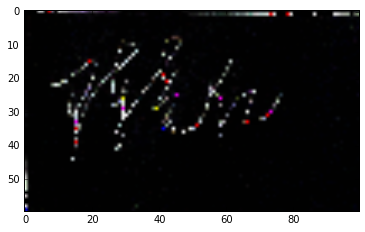

[[1. 0.]] [[1. 0.]]


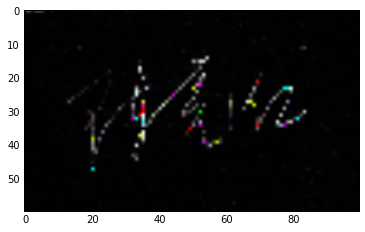

[[1. 0.]] [[1. 0.]]


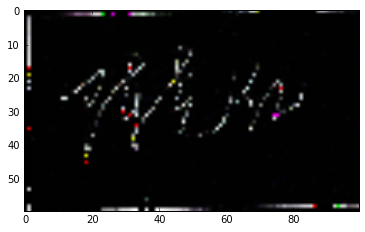

[[1. 0.]] [[1. 0.]]


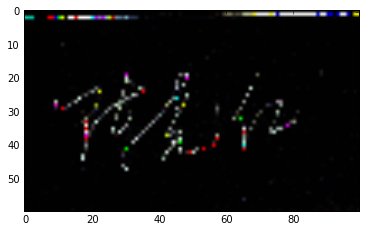

[[1. 0.]] [[1. 0.]]


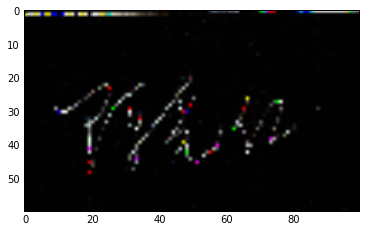

[[1. 0.]] [[1. 0.]]


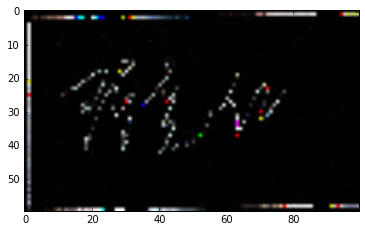

[[1. 0.]] [[1. 0.]]


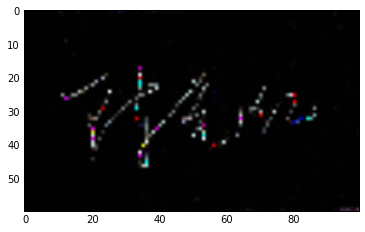

[[1. 0.]] [[1. 0.]]


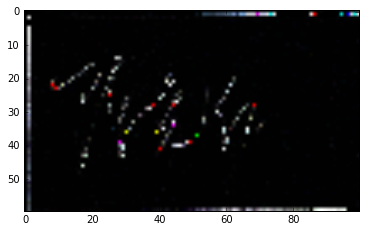

[[1. 0.]] [[1. 0.]]


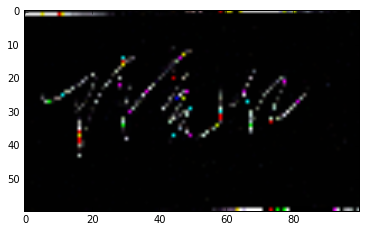

[[1. 0.]] [[1. 0.]]


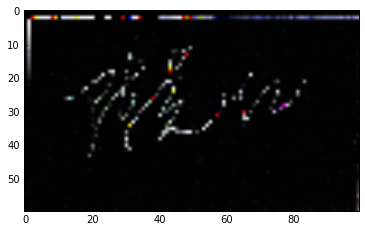

[[1. 0.]] [[1. 0.]]


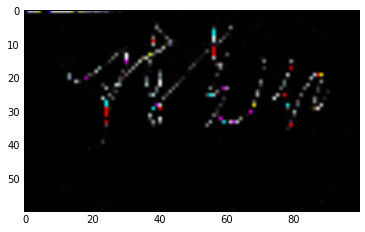

[[1. 0.]] [[1. 0.]]


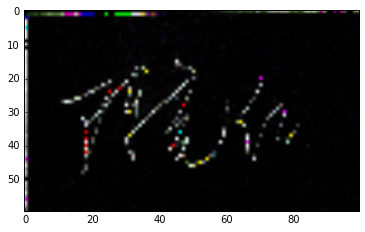

[[1. 0.]] [[1. 0.]]


In [30]:
%matplotlib inline
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.applications import VGG19

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(60, 100, 3))

test_dir = "/home/ajith/sig/dataset/trainingSet/train/person01_invalid/"
fnames = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir)]
top = 2
for fname in fnames:
    img_path = fname
    img = image.load_img(img_path, target_size=(60, 100))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    #x /= 255 
    plt.imshow(x[0])
    plt.show()
    x = preprocess_input(x)
    from keras.models import Model
    layer_name = 'block2_pool'
    intermediate_layer_model = Model(inputs=conv_base.input,
                             outputs=conv_base.get_layer(layer_name).output)
    preds = intermediate_layer_model.predict(x)
    features = np.zeros(shape=(1, 15, 25, 128))
    features[0 : 1] = preds
    features = np.reshape(features, (1, 15 * 25 * 128))
    preds = model.predict(features)
    predictions = model.predict_proba(features)
    print(preds,predictions)

In [34]:
model.save('/home/ajith/saved_models/01.h5')

In [50]:
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
models_dir = "/home/ajith/saved_models/"


def verify(img, id): 
    img = image.load_img(img, target_size=(60,100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    model = load_model(models_dir+str(id)+".h5")
    from keras.models import Model
    layer_name = 'block2_pool'
    intermediate_layer_model = Model(inputs=conv_base.input,
                             outputs=conv_base.get_layer(layer_name).output)
    preds = intermediate_layer_model.predict(img_array)
    features = np.zeros(shape=(1, 15, 25, 128))
    features[0 : 1] = preds
    features = np.reshape(features, (1, 15 * 25 * 128))
    pred = model.predict(features)
    print(pred)
    if pred[0][1] >= 0.5:
        return True
    else:
        return False
    
def process_input(image,id):
    if verify(image,id):
        print("Signature is valid")
    else:
        print("Signature is invalid")

In [52]:
process_input("/home/ajith/sig/dataset/trainingSet/train/person01_valid/001_1.png","01")

[[0. 1.]]
Signature is valid
